# FashionMnist Classification

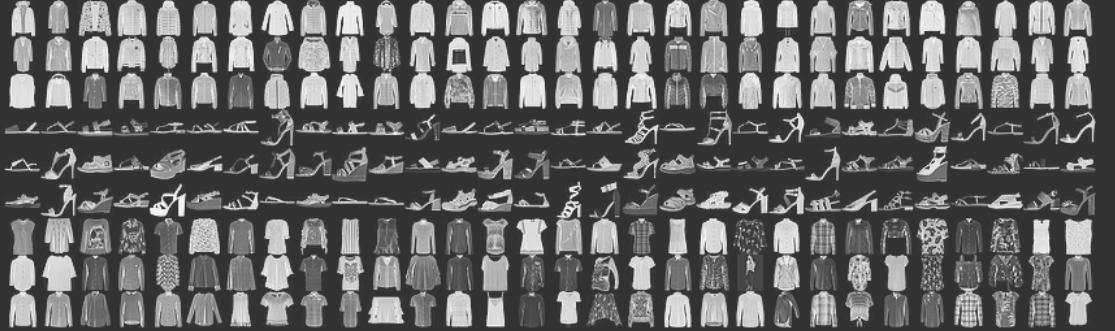

In [1]:
from IPython import display
display.Image("https://peltarion.com/static/fashion-mnist_long.png")

Fashion-MNIST is a dataset of images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Each training and test example is assigned to one of the following labels:

- **0** : T-shirt/top
- **1** : Trouser
- **2** : Pullover
- **3** : Dress
- **4** : Coat
- **5** : Sandal
- **6** : Shirt
- **7** : Sneaker
- **8** : Bag
- **9** : Ankle boot

## Import Libraries

In [305]:
#import the dataset
from keras.datasets import fashion_mnist

#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import Preparations for the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

#import the model
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

#ignore warnings of python
import warnings
warnings.filterwarnings('ignore')

## Part 1 : Familiarity with the dataset

In [62]:
# Load the data
data = fashion_mnist.load_data()

In [63]:
# Split the data to training and testing
((train_X, train_Y), (test_X, test_Y)) = data

In [64]:
print("The shape of testing the data :",test_X.shape)
print("The shape of training the data :",train_X.shape)

The shape of testing the data : (10000, 28, 28)
The shape of training the data : (60000, 28, 28)


In [65]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

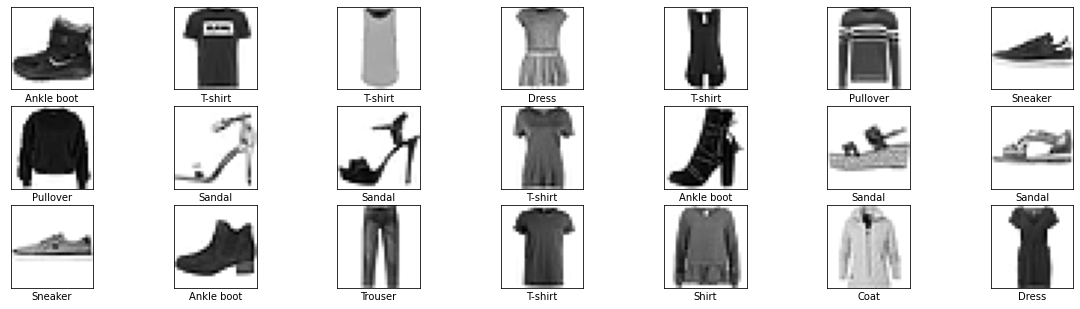

In [66]:
# Plot the first 25 elements from training
plt.figure(figsize=(20,7))
for i in range(21):
    plt.subplot(4,7,i+1)
    plt.imshow(train_X[i], cmap='binary')
    plt.xlabel(class_names[train_Y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [67]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

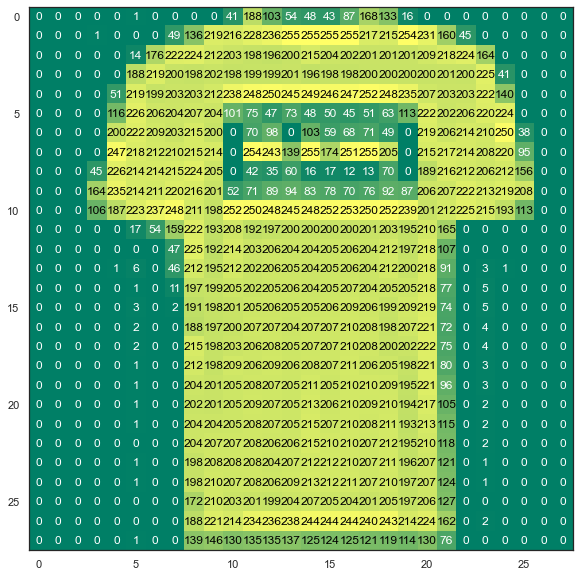

In [711]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot()
visualize_input(train_X[1], ax)

## Part 2 : Preparation dataset for analysis

In [10]:
# Reshape the data 
train_X = train_X.reshape(60000, 28*28)
test_X = test_X.reshape(10000,28*28)

In [11]:
print("The shape of testing the data :",test_X.shape)
print("The shape of training the data :",train_X.shape)

The shape of testing the data : (10000, 784)
The shape of training the data : (60000, 784)


In [12]:
df = pd.DataFrame(train_X)

In [13]:
# Change name of columns
cols = list(df.columns)
df.rename(columns={cols[i]:'Pixel'+str(i) for i in range(len(cols)) } , inplace=True)

In [14]:
# Add label columns
df.insert(len(df.columns), 'fashion_item', train_Y)

In [15]:
print("The shape of training the data :",df.shape)

The shape of training the data : (60000, 785)


In [16]:
df.head(7)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,22,...,0,0,0,133,167,73,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [17]:
df.describe()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883,4.500000
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829,2.872305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000,9.000000


In [18]:
# Check for missing values
df.isnull().sum().sum()

0

In [19]:
# Rename the column׳s label so that it is displayed in the graph as a word and not as a number
df['fashion'] = df['fashion_item'].copy()
k=df['fashion'].replace({0 :'T-Shirt/Top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle Boot'})


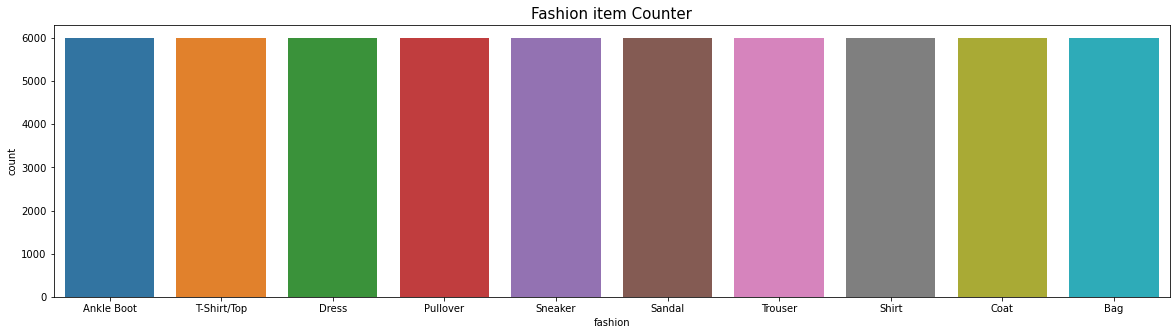

In [20]:
# plot graph for count values of fashion item
axis=plt.subplots(figsize = (20,5))
plt.title("Fashion item Counter", size=15)
sns.countplot(k)

plt.show()

In [21]:
# Return to original Dataframe
df.drop(['fashion'], axis=1, inplace=True)

## Part 3 : Explore the data

- We will divide the data into training and test, since we have already split the data <br>
we will test each model in a test from the trainig so that in the end <br>
the best model we will use for the real test.

In [22]:
# Divide the data into training and test
X = df.drop(columns=['fashion_item'])
Y = df['fashion_item']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)
test_X = test_X.copy() 

#### Scaling the data

In [23]:
X_train = X_train / 255
X_test = X_test / 255
test_X = test_X / 255

In [24]:
X_train.describe()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.000004,0.000021,0.000121,0.000418,0.001011,0.001705,0.003251,0.008495,0.022112,0.056571,...,0.135407,0.090516,0.064375,0.069318,0.089694,0.070424,0.033465,0.010736,0.003300,0.000283
std,0.000405,0.000834,0.003170,0.010177,0.017400,0.023643,0.032496,0.054573,0.092565,0.149813,...,0.225520,0.190997,0.163904,0.171063,0.203298,0.177138,0.115897,0.068196,0.036363,0.007907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.098039,0.466667,0.643137,0.878431,0.901961,0.866667,0.866667,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


In [25]:
print("The shape of Testing the data :",X_test.shape)
print("The shape of Training the data :",X_train.shape)
print("The shape of real Testing of the data :",test_X.shape)

The shape of Testing the data : (12000, 784)
The shape of Training the data : (48000, 784)
The shape of real Testing of the data : (10000, 784)


In [26]:
# Calculates the correlation between any two features
corr = df.corr().abs()

In [27]:
corr.sample(5)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel491,0.002215,0.000927,0.000099,0.001332,0.008143,0.008986,0.000957,0.002003,0.018681,0.042262,...,0.080191,0.070262,0.065366,0.080467,0.087757,0.050693,0.008279,0.004461,0.001035,0.090100
Pixel330,0.001272,0.006545,0.012338,0.016050,0.019008,0.027002,0.019432,0.004647,0.021328,0.106064,...,0.106525,0.047959,0.119776,0.267699,0.286887,0.208565,0.108590,0.055824,0.020464,0.365224
Pixel469,0.001950,0.005374,0.002953,0.006477,0.007217,0.009929,0.002731,0.026605,0.074295,0.174772,...,0.177265,0.090200,0.176485,0.321575,0.278130,0.155095,0.049051,0.030348,0.013571,0.512094
Pixel686,0.004816,0.011000,0.023028,0.023394,0.028537,0.032015,0.032087,0.058576,0.085869,0.102317,...,0.354311,0.304157,0.229428,0.212176,0.204511,0.162678,0.102120,0.062101,0.022898,0.196459
Pixel612,0.002713,0.015915,0.010419,0.018232,0.024454,0.026389,0.015788,0.006952,0.030489,0.095414,...,0.139712,0.087304,0.060008,0.111576,0.273580,0.345762,0.218252,0.112611,0.044991,0.467905


In [28]:
# New dataframe that showing the correlation higher than 0.6
corr_threshold  = corr[corr.fashion_item > 0.6]

In [29]:
# We look for the correlation only between the pixels and the fashion item
corr_threshold = corr_threshold.drop(['fashion_item'])

In [30]:
corr_threshold.sample(7)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel45,0.002734,0.001189,0.019980,0.022101,0.023909,0.036461,0.052136,0.093934,0.185050,0.352854,...,0.245757,0.184963,0.138301,0.167871,0.186630,0.148340,0.061934,0.011554,0.000605,0.622335
Pixel446,0.002649,0.002827,0.009727,0.010482,0.009462,0.015670,0.037969,0.076269,0.130238,0.219198,...,0.260148,0.204885,0.207955,0.228608,0.190867,0.096156,0.036267,0.080233,0.038277,0.611009
Pixel500,0.003857,0.005205,0.000880,0.008158,0.012288,0.015783,0.001701,0.031153,0.071811,0.168104,...,0.225057,0.154301,0.151727,0.055089,0.089443,0.205959,0.167555,0.083414,0.031285,0.610573
Pixel473,0.003388,0.007814,0.000353,0.001994,0.006799,0.008092,0.016868,0.053490,0.106780,0.209044,...,0.246343,0.176586,0.189426,0.223535,0.157975,0.017648,0.122850,0.103598,0.033969,0.656616
Pixel67,0.005165,0.002716,0.012899,0.015243,0.019007,0.028200,0.039333,0.070188,0.145085,0.264055,...,0.252900,0.174401,0.191448,0.241936,0.226324,0.128139,0.004294,0.026476,0.003413,0.619818
Pixel39,0.000839,0.002084,0.016843,0.019952,0.021185,0.030680,0.039138,0.069957,0.150409,0.316208,...,0.241638,0.169638,0.170968,0.211241,0.203406,0.117244,0.000582,0.035141,0.011473,0.675620
Pixel94,0.004016,0.004428,0.015026,0.016332,0.021303,0.032815,0.041288,0.068202,0.136900,0.259730,...,0.243393,0.161979,0.175283,0.233935,0.222739,0.126571,0.001051,0.030008,0.005656,0.631061


In [31]:
# Make a last column first to see better the relevant information
cols = list(corr_threshold.columns)
cols = [cols[-1]] + cols[:-1]
corr_threshold = corr_threshold[cols]

In [32]:
# Looking for the largest correlation
max_value = corr_threshold['fashion_item'].max()
corr_threshold.loc[corr_threshold['fashion_item'] == max_value]

,fashion_item,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
Pixel39,0.67562,0.000839,0.002084,0.016843,0.019952,0.021185,0.03068,0.039138,0.069957,0.150409,...,0.358404,0.241638,0.169638,0.170968,0.211241,0.203406,0.117244,0.000582,0.035141,0.011473


In [33]:
# Looking for number of pixels which have major impact
print("the number of Pixels that have a major impact :",corr_threshold['fashion_item'].count())

the number of Pixels that have a major impact : 36


In [34]:
#Create Dataframe with the only relevant feature
corr_threshold_1f=corr_threshold["fashion_item"].copy()
corr_threshold_1f=pd.DataFrame(corr_threshold_1f)
corr_threshold_1f.sample(5)

,fashion_item
Pixel66,0.630239
Pixel501,0.631689
Pixel41,0.618872
Pixel474,0.617530
Pixel122,0.620830


In [35]:
corr_threshold_1f.rename(columns = {'fashion_item':'correlation with fashion item'}, inplace = True)

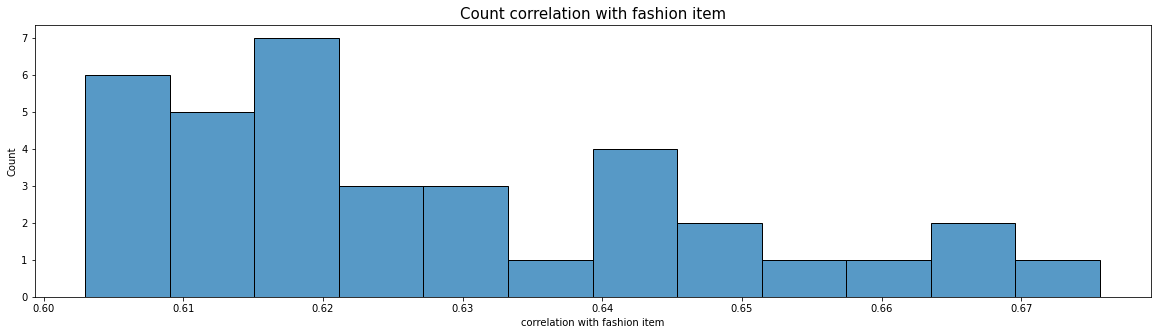

In [46]:
# Visualization of amount correlation values with the relevant feature
axis=plt.subplots(figsize = (20,5))
sns.histplot(data = corr_threshold_1f, x="correlation with fashion item", bins=12);
plt.title("Count correlation with fashion item", size=15)
plt.show()

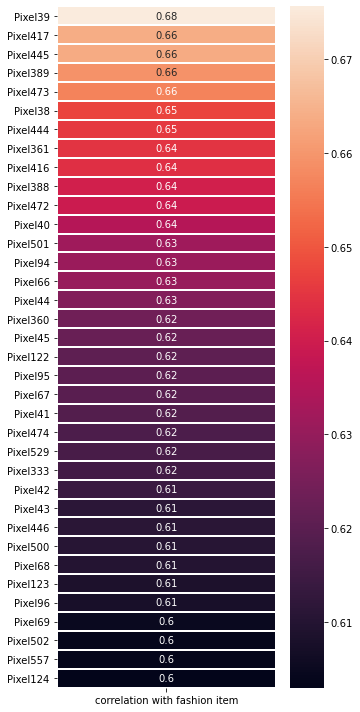

In [49]:
# Plot heatmap to show the corroletion in visually way
fig, ax = plt.subplots(figsize=(5,10))

sns.heatmap(corr_threshold_1f.sort_values(by='correlation with fashion item',ascending=False, ),annot=True ,linewidths=True )

plt.tight_layout()
plt.show ();

- In conclusion : <br>
We have come to know that a very small number of pixels have a high correlation on the items <br>
Plus the highest correlation is less than 0.7 so it does not  have such affect the items 

In [38]:
# Create a dummy model Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,Y_train)
dummy_clf.predict(X)
dummy_clf.score(X,Y)

0.1

- In conclusion : <br>
If the model always classifies something frequently then the highest level of accuracy will be 0.1 which is<br> a very low level of accuracy that any model is capable of beating.<br>
In order to solve this problem we will define Bayes' naive model as the zero model for the simple reason that it works<br> in a way that there is no connection between one feature and another<br>
And on the other hand we get a higher level of accuracy for the zero model

### Model #0 : Naive Bayes

In [555]:
# Using naive bayes model 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
y_predict_naive_bayes = naive_bayes.fit(X_train, Y_train).predict(X_test)
naive_bayes_accuracy = accuracy_score(Y_test,y_predict_naive_bayes)

In [40]:
print("The accuracy of the zero model is {:0.4f}%".format(naive_bayes_accuracy*100))

The accuracy of the zero model is 59.1000%


#### Confusion matrix 

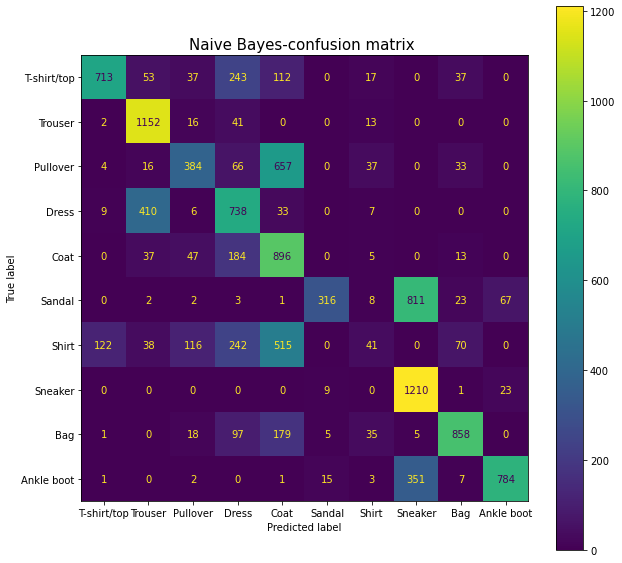

In [41]:
# Plot confusion matrix 
confusion_matrix_naive_bayes = confusion_matrix(Y_test, y_predict_naive_bayes)
ConfusionMatrixDisplay_naive_bayes = ConfusionMatrixDisplay(confusion_matrix_naive_bayes, display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Naive Bayes-confusion matrix ", size=15)
ConfusionMatrixDisplay_naive_bayes.plot(ax=ax);

In [556]:
# Classification report
naive_bayes_prec = precision_score(y_predict_naive_bayes,Y_test, average='macro')
print('precision:',naive_bayes_prec)
naive_bayes_recall = recall_score(y_predict_naive_bayes,Y_test, average='macro')
print('recall:',naive_bayes_recall)
naive_bayes_f1 = f1_score(y_predict_naive_bayes,Y_test, average='macro')
print('f1:',naive_bayes_f1)
naive_bayes_f2 = metrics.fbeta_score(y_predict_naive_bayes, Y_test, beta=3,average='macro')
print("f2:",naive_bayes_f2)

precision: 0.5877075009019972
recall: 0.634672724650212
f1: 0.558966920622803
f2: 0.6019062952621458


- In conclusion : <br>
the zero model of naive bayes accurecy is about 60% <br>
as a result all other models accurecy should be higer than 60%


## Part 4 : Training and Testing Models

We will look at the models as we have learned in the past in the simplest way <br>
and not using Dimensionality Reduction

### Model #1 : KNN - K-Nearest Neighbors


In [42]:
# Using Knn model 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_predict_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test,y_predict_knn)

In [43]:
print("The accuracy of Knn model is {:0.4f}%".format(knn_accuracy*100))

The accuracy of Knn model is 85.6083%


#### Tuning Hyper Parameters with CV

Text(0, 0.5, 'Testing Accuracy')

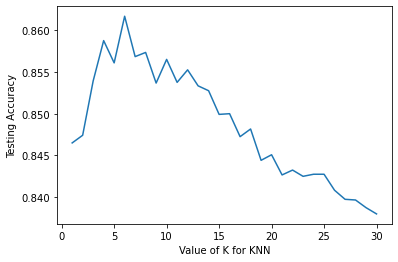

In [165]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_predict_knn = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,y_predict_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [43]:
# Cross validition to find the best n_neighbors parameter
for k in range(1,31,2):
    knn_k = KNeighborsClassifier(n_neighbors = k )
    ValScore = cross_val_score(knn_k, X_train, Y_train, cv = 5).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.8393125
Cross-validation score for k = 3 is: 0.8433541666666667
Cross-validation score for k = 5 is: 0.8461041666666667
Cross-validation score for k = 7 is: 0.8452083333333333
Cross-validation score for k = 9 is: 0.844375
Cross-validation score for k = 11 is: 0.842375
Cross-validation score for k = 13 is: 0.8414166666666666
Cross-validation score for k = 15 is: 0.8394375
Cross-validation score for k = 17 is: 0.8386666666666667
Cross-validation score for k = 19 is: 0.8363125
Cross-validation score for k = 21 is: 0.8354166666666667
Cross-validation score for k = 23 is: 0.8341666666666666
Cross-validation score for k = 25 is: 0.8331874999999999
Cross-validation score for k = 27 is: 0.8317916666666667
Cross-validation score for k = 29 is: 0.8313125


In [69]:
print("the best n_neighbors is 5 or 6 we will find it with RandomizedSearchCV ")

the best n_neighbors is 5 or 6 we will find it with RandomizedSearchCV 


#### Tuning Hyper Parameters with RandomizedSearchCV

In [47]:
# Search for parameters to tune
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [65]:
# Define the options of the main parameters
weights = ['uniform','distance']
p = [1,2]
n_neighbors = [5,6]

In [66]:
# Define the param_grid
param_grid = { 'weights': weights ,'p' : p,'n_neighbors':n_neighbors}
print(param_grid)

{'weights': ['uniform', 'distance'], 'p': [1, 2], 'n_neighbors': [5, 6]}


In [67]:
# Using RandomizedSearchCV with 5 Cv
knn_RandomGrid = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [68]:
# Fitting the RandomizedSearchCV with training data  
knn_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
                   param_distributions={'n_neighbors': [5, 6], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [69]:
# print the best parameters
knn_RandomGrid.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 6}

In [50]:
# Tuning the metric parameters separately in order to reduce runing time
metric = ['euclidean','manhattan' , 'chebyshev' ,'minkowski']

In [51]:
# Define the param_grid
param_grid = {'metric': metric}
print(param_grid)

{'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}


In [52]:
# Using RandomizedSearchCV with 5 CV
knn_RandomGrid = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [53]:
# Fitting the RandomizedSearchCV with training data  
knn_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski']},
                   verbose=2)

In [54]:
# print the best parameters
knn_RandomGrid.best_params_

{'metric': 'manhattan'}

In [70]:
# print the best score of model that pick from RandomGrid
print(knn_RandomGrid.best_score_)

0.8597916666666666


In [122]:
# Finally the best score model with tuning hyperparameters
knn = KNeighborsClassifier(algorithm='auto', weights ='distance', p=1, n_neighbors=6, n_jobs=4,metric = 'manhattan')
knn.fit(X_train, Y_train)
y_predict_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test,y_predict_knn)

In [58]:
print("The accuracy of Knn model is {:0.4f}%".format(knn_accuracy*100))

The accuracy of Knn model is 86.5667%


- **To sum up** : <br>
we succeeded to push the model for better performance with a **86.5667** percentage of accuracy <br>
using hyper-parameter tuining with croos validation

#### Confusion matrix 

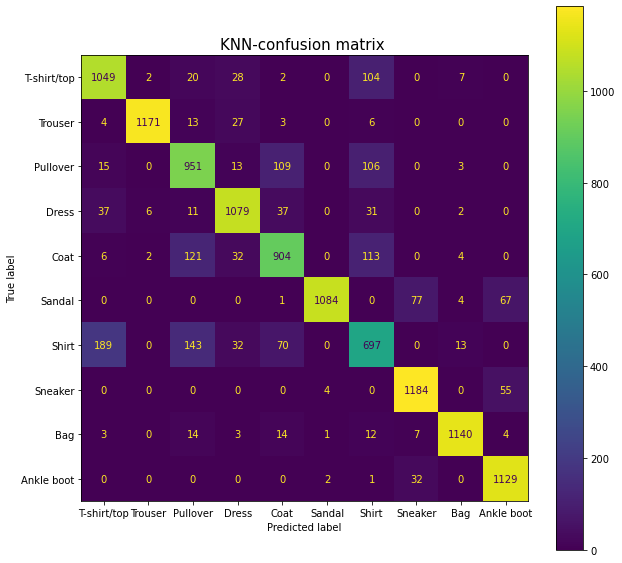

In [59]:
# Plot confusion matrix 
confusion_matrix_knn = confusion_matrix(Y_test, y_predict_knn)
ConfusionMatrixDisplay_knn = ConfusionMatrixDisplay(confusion_matrix_knn, display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("KNN-confusion matrix ", size=15)
ConfusionMatrixDisplay_knn.plot(ax=ax);

In [143]:
# Classification report
knn_prec = precision_score(y_predict_knn,Y_test, average='macro')
print('precision:',knn_prec)
knn_recall = recall_score(y_predict_knn,Y_test, average='macro')
print('recall:',knn_recall)
knn_f1 = f1_score(y_predict_knn,Y_test, average='macro')
print('f1:',knn_f1)
knn_f2 = metrics.fbeta_score(y_predict_knn, Y_test, beta=3,average='macro')
print("f2:",knn_f2)

precision: 0.8640900586062943
recall: 0.8652655425701283
f1: 0.8638272128523894
f2: 0.8648377173429223


### Model #2 : Random Forest

In [26]:
# Using Random Forest model 
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
y_predict_random_forest = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test,y_predict_random_forest)

In [27]:
print("The accuracy of Random Forest model is {:0.4f}%".format(random_forest_accuracy*100))

The accuracy of Random Forest model is 88.1167%


#### Tuning Hyper Parameters with CV

The score for n_estimators = 100 is: 0.8838333333333334
The score for n_estimators = 200 is: 0.8841666666666667
The score for n_estimators = 300 is: 0.8849166666666667
The score for n_estimators = 400 is: 0.88525
The score for n_estimators = 500 is: 0.8854166666666666
The score for n_estimators = 600 is: 0.8854166666666666
The score for n_estimators = 700 is: 0.8853333333333333
The score for n_estimators = 800 is: 0.8866666666666667
The score for n_estimators = 900 is: 0.88625
The score for n_estimators = 1000 is: 0.8860833333333333


Text(0, 0.5, 'Testing Accuracy')

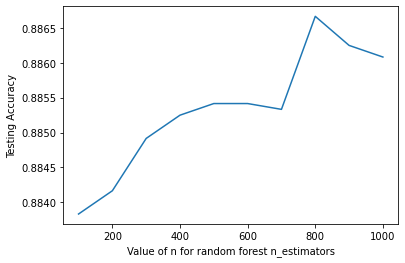

In [30]:
n_range = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
scores = []
for n in n_range:
    random_forest = RandomForestClassifier(n_estimators=n)
    random_forest.fit(X_train,Y_train)
    y_predict_random_forest = random_forest.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,y_predict_random_forest))
    print(f"The score for n_estimators = {n} is:", metrics.accuracy_score(Y_test,y_predict_random_forest))
    
plt.plot(n_range, scores)
plt.xlabel('Value of n for random forest n_estimators')
plt.ylabel('Testing Accuracy')

In [33]:
# Search for better n_estimators=2000 randomly choose to get a sense of what's coming after 1000
random_forest = RandomForestClassifier(n_estimators=2000)
random_forest.fit(X_train,Y_train)
y_predict_random_forest = random_forest.predict(X_test)
print(f"The score for n_estimators = {2000} is:", metrics.accuracy_score(Y_test,y_predict_random_forest))

The score for n_estimators = 2000 is: 0.8854166666666666


In [34]:
# Cross validition to find the best n_estimators parameter
for n in n_range:
    random_forest = RandomForestClassifier(n_estimators=n)
    ValScore = cross_val_score(random_forest, X_train, Y_train, cv = 5).mean()
    print(f"Cross-validation score for n_estimators = {n} is:", ValScore)

Cross-validation score for n_estimators = 100 is: 0.8713958333333334
Cross-validation score for n_estimators = 200 is: 0.8743541666666667
Cross-validation score for n_estimators = 300 is: 0.8747916666666666
Cross-validation score for n_estimators = 400 is: 0.8753958333333334
Cross-validation score for n_estimators = 500 is: 0.8757291666666667
Cross-validation score for n_estimators = 600 is: 0.87475
Cross-validation score for n_estimators = 700 is: 0.8752291666666667
Cross-validation score for n_estimators = 800 is: 0.8758958333333333
Cross-validation score for n_estimators = 900 is: 0.8752500000000001
Cross-validation score for n_estimators = 1000 is: 0.8753124999999999


In [47]:
# Search for parameters to tune
random_forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [98]:
# Cross validition to find the best max_depth parameter
max_depth = [int(x) for x in np.linspace(start = 0, stop = 300, num = 7)]
for n in max_depth:
    random_forest = RandomForestClassifier(n_estimators=800,max_depth=n)
    ValScore = cross_val_score(random_forest, X_train, Y_train, cv = 5).mean()
    print(f"Cross-validation score for max_depth = {n} is:", ValScore)

Cross-validation score for max_depth = 0 is: nan
Cross-validation score for max_depth = 50 is: 0.8761041666666667
Cross-validation score for max_depth = 100 is: 0.8758125
Cross-validation score for max_depth = 150 is: 0.87525
Cross-validation score for max_depth = 200 is: 0.875375
Cross-validation score for max_depth = 250 is: 0.8755
Cross-validation score for max_depth = 300 is: 0.8759375


In [99]:
# Finally the best score model with tuning hyperparameters
random_forest = RandomForestClassifier(n_estimators=800,max_depth=50,n_jobs=4)
random_forest.fit(X_train, Y_train)
y_predict_random_forest = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test,y_predict_random_forest)

In [100]:
print("The accuracy of Random Forest model is {:0.4f}%".format(random_forest_accuracy*100))

The accuracy of Random Forest model is 88.4583%


- **To sum up** : <br>
We managed to push the model for better performance a bit with a **88.4583** percentage of accuracy <br>
using hyper-parameter tuining with croos validation

#### Confusion matrix 

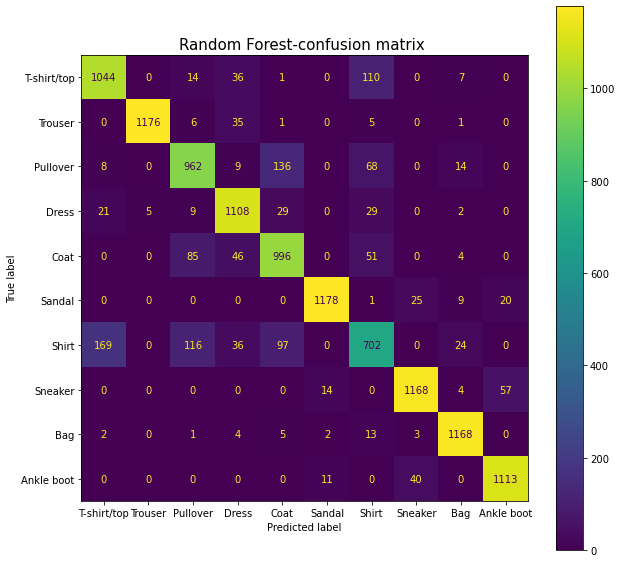

In [118]:
# Plot confusion matrix 
confusion_matrix_random_forest = confusion_matrix(Y_test, y_predict_random_forest)
ConfusionMatrixDisplay_random_forest = ConfusionMatrixDisplay(confusion_matrix_random_forest, 
                                                              display_labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                                                                              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])                                      

fig,ax = plt.subplots(figsize=(10,10))
plt.title("Random Forest-confusion matrix ", size=15)
ConfusionMatrixDisplay_random_forest.plot(ax=ax);

In [141]:
# Classification report
random_forest_prec = precision_score(y_predict_random_forest,Y_test, average='macro')
print('precision:',random_forest_prec)
random_forest_recall = recall_score(y_predict_random_forest,Y_test, average='macro')
print('recall:',random_forest_recall)
random_forest_f1 = f1_score(y_predict_random_forest,Y_test, average='macro')
print('f1:',random_forest_f1)
random_forest_f2 = metrics.fbeta_score(y_predict_random_forest, Y_test, beta=3,average='macro')
print("f2:",random_forest_f2)

precision: 0.8829352310774905
recall: 0.8820631165180342
f1: 0.8818390529629809
f2: 0.8819045426451725


### Model #3 : Logistic Regression

In [48]:
# Using Logistic Regression model 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test,y_predict_logistic_regression)

In [49]:
print("The accuracy of Random Forest model is {:0.4f}%".format(logistic_regression_accuracy*100))

The accuracy of Random Forest model is 85.5000%


#### Tuning Hyper Parameters with RandomizedSearchCV

In [50]:
# Search for parameters to tune
logistic_regression.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [125]:
# Define the options of the main parameters
C = [100, 10, 1.0, 0.1, 0.01]
class_weight = [None,'balanced']
dual = [None,True, False]
penalty = ['none', 'l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [126]:
# Define the param_grid
param_grid = { 'C': C,
               'class_weight': class_weight,
               'dual': dual,
               'penalty': penalty,
               'solver': solver}
print(param_grid)

{'C': [100, 10, 1.0, 0.1, 0.01], 'class_weight': [None, 'balanced'], 'dual': [None, True, False], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [127]:
# Using RandomizedSearchCV with 5 CV
logistic_regression_RandomGrid = RandomizedSearchCV(estimator = logistic_regression, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [128]:
# Fitting the RandomizedSearchCV with training data  
logistic_regression_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [None, True, False],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=2)

In [129]:
# print the best parameters
logistic_regression_RandomGrid.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'dual': None,
 'class_weight': 'balanced',
 'C': 0.1}

In [154]:
logistic_regression_accuracy = logistic_regression_RandomGrid.best_score_
print("The accuracy of Random Forest model is {:0.4f}%".format(logistic_regression_RandomGrid.best_score_*100))

The accuracy of Random Forest model is 85.6833%


#### Confusion matrix 

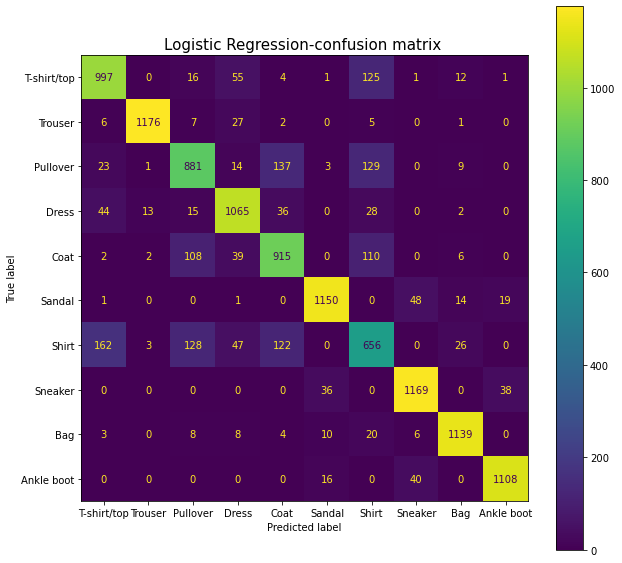

In [134]:
# Plot confusion matrix 
confusion_matrix_logistic_regression = confusion_matrix(Y_test, y_predict_logistic_regression)
ConfusionMatrixDisplay_logistic_regression = ConfusionMatrixDisplay(confusion_matrix_logistic_regression , display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Logistic Regression-confusion matrix ", size=15)
ConfusionMatrixDisplay_logistic_regression.plot(ax=ax);

In [155]:
# Classification report
logistic_regression_prec = precision_score(y_predict_logistic_regression,Y_test, average='macro')
print('precision:',logistic_regression_prec)
logistic_regression_recall = recall_score(y_predict_logistic_regression,Y_test, average='macro')
print('recall:',logistic_regression_recall)
logistic_regression_f1 = f1_score(y_predict_logistic_regression,Y_test, average='macro')
print('f1:',logistic_regression_f1)
logistic_regression_f2 = metrics.fbeta_score(y_predict_logistic_regression, Y_test, beta=3,average='macro')
print("f2:",logistic_regression_f2)

precision: 0.8525562642627863
recall: 0.8517177629845337
f1: 0.8519720003111828
f2: 0.8517419584062947


### Model #4 : AdaBoost

In [162]:
# Using AdaBoost Voting model
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier(base_estimator=random_forest)
ada_boost.fit(X_train, Y_train)
y_predict_ada_boost = ada_boost.predict(X_test)
ada_accuracy = accuracy_score(Y_test,y_predict_ada_boost)

In [163]:
print("The accuracy of AdaBoost model is {:0.4f}%".format(ada_accuracy*100))

The accuracy of AdaBoost model is 88.5083%


#### Confusion matrix 

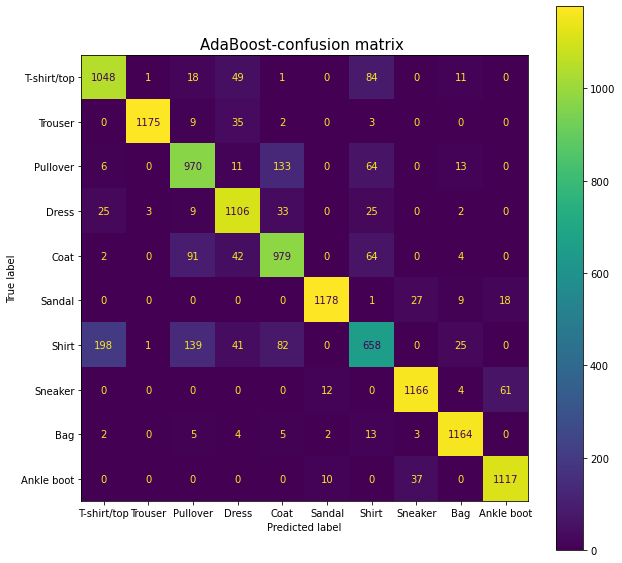

In [159]:
# Plot confusion matrix 
confusion_matrix_ada_boost = confusion_matrix(Y_test, y_predict_ada_boost)
ConfusionMatrixDisplay_ada_boost = ConfusionMatrixDisplay(confusion_matrix_ada_boost , display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("AdaBoost-confusion matrix ", size=15)
ConfusionMatrixDisplay_ada_boost.plot(ax=ax);

In [171]:
ada_boost_prec = precision_score(y_predict_ada_boost,Y_test, average='macro')
print('precision:',ada_boost_prec)
ada_boost_recall = recall_score(y_predict_ada_boost,Y_test, average='macro')
print('recall:',ada_boost_recall)
ada_boost_f1 = f1_score(y_predict_ada_boost,Y_test, average='macro')
print('f1:',ada_boost_f1)
ada_boost_f2 = metrics.fbeta_score(y_predict_ada_boost, Y_test, beta=3,average='macro')
print("f2:",ada_boost_f2)

precision: 0.8834452997159531
recall: 0.8828060638047006
f1: 0.8823201933861323
f2: 0.8825672519787396


### Model #5 : Hard and Soft Voting

In [167]:
# Using Hard and Soft Voting model
model_1 = knn
model_2 = random_forest
model_3 = logistic_regression
model_4 = ada_boost

##### Hard Voting

In [177]:
hard_voting = VotingClassifier(estimators=[('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)], voting='hard')
hard_voting.fit(X_train, Y_train)
y_predict_hard_voting = hard_voting.predict(X_test)
hard_voting_accuracy = accuracy_score(Y_test,y_predict_hard_voting)

In [178]:
print("The accuracy of Hard Voting model is {:0.4f}%".format(hard_voting_accuracy*100))

The accuracy of Hard Voting model is 88.7083%


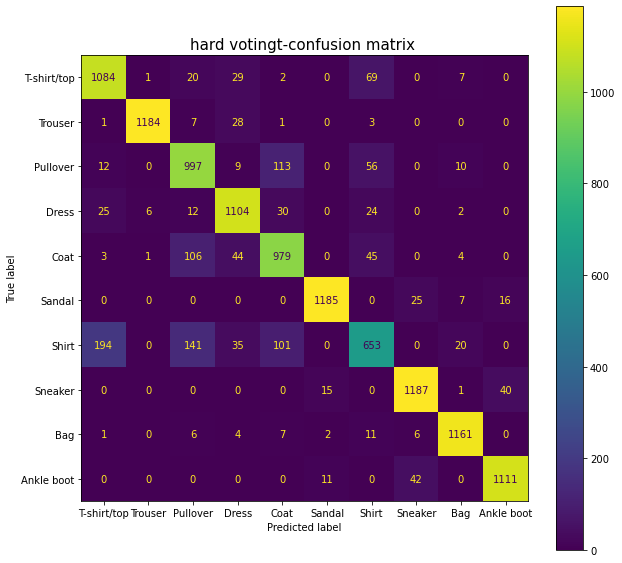

In [179]:
# Plot confusion matrix 
confusion_matrix_hard_voting = confusion_matrix(Y_test, y_predict_hard_voting)
ConfusionMatrixDisplay_hard_voting = ConfusionMatrixDisplay(confusion_matrix_hard_voting , display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("hard votingt-confusion matrix ", size=15)
ConfusionMatrixDisplay_hard_voting.plot(ax=ax);

In [180]:
hard_voting_prec = precision_score(y_predict_hard_voting,Y_test, average='macro')
print('precision:',hard_voting_prec)
hard_voting_recall = recall_score(y_predict_hard_voting,Y_test, average='macro')
print('recall:',hard_voting_recall)
hard_voting_f1 = f1_score(y_predict_hard_voting,Y_test, average='macro')
print('f1:',hard_voting_f1)
hard_voting_f2 = metrics.fbeta_score(y_predict_hard_voting, Y_test, beta=3,average='macro')
print("f2:",hard_voting_f2)

precision: 0.8850993258146843
recall: 0.8850387460532916
f1: 0.8833739847886442
f2: 0.8843772664638625


##### Soft Voting

In [185]:
soft_voting = VotingClassifier(estimators=[('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)],
                               voting='soft' , weights=[1,3,1,5])
soft_voting.fit(X_train, Y_train)
y_predict_soft_voting = soft_voting.predict(X_test)
soft_voting_accuracy = accuracy_score(Y_test,y_predict_soft_voting)

In [182]:
print("The accuracy of Soft Voting model is {:0.4f}%".format(soft_voting_accuracy*100))

The accuracy of Soft Voting model is 88.8167%


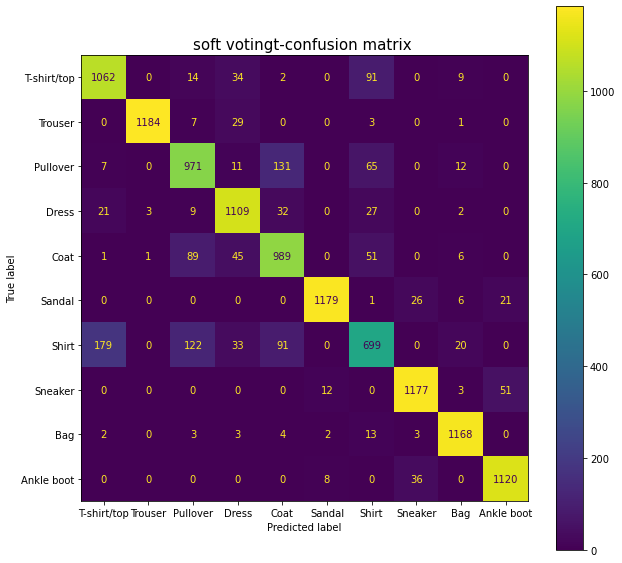

In [183]:
# Plot confusion matrix 
confusion_matrix_soft_voting = confusion_matrix(Y_test, y_predict_soft_voting)
ConfusionMatrixDisplay_soft_voting = ConfusionMatrixDisplay(confusion_matrix_soft_voting , display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("soft votingt-confusion matrix ", size=15)
ConfusionMatrixDisplay_soft_voting.plot(ax=ax);

In [186]:
soft_voting_prec = precision_score(y_predict_soft_voting,Y_test, average='macro')
print('precision:',soft_voting_prec)
soft_voting_recall = recall_score(y_predict_soft_voting,Y_test, average='macro')
print('recall:',soft_voting_recall)
soft_voting_f1 = f1_score(y_predict_soft_voting,Y_test, average='macro')
print('f1:',soft_voting_f1)
soft_voting_f2 = metrics.fbeta_score(y_predict_soft_voting, Y_test, beta=3,average='macro')
print("f2:",soft_voting_f2)

precision: 0.8873362520762582
recall: 0.8865647792313794
f1: 0.8861734945774163
f2: 0.8863486279350902


### Temporary summary of the results

We will deal with the results of the diffrent models <br>
in order to optimize the test process that will be performed in the next step <br>
Moreover,we will select a single model with the high preformence <br>
this model we will using for the real test

In [557]:
# Creating DataFrame of the different model performance
model = ['Naive Bayes','KNN - K-Nearest Neighbors' , 'Random Forest' , 'Logistic Regression' , 'AdaBoost' , 'Hard Voting' , 'Soft Voting']
precision = [naive_bayes_prec,knn_prec , random_forest_prec , logistic_regression_prec,ada_boost_prec,soft_voting_prec,hard_voting_prec]
recall = [naive_bayes_recall,knn_recall , random_forest_recall , logistic_regression_recall,ada_boost_recall,soft_voting_recall,hard_voting_recall]
f1 = [naive_bayes_f1,knn_f1 , random_forest_f1 , logistic_regression_f1,ada_boost_f1,soft_voting_f1 , hard_voting_f1]
f2 = [naive_bayes_f2,knn_f2 , random_forest_f2 , logistic_regression_f2,ada_boost_f2,soft_voting_f2,hard_voting_f2]
accuracy = [naive_bayes_accuracy,knn_acc , random_forest_accuracy , logistic_regression_accuracy,ada_accuracy,soft_voting_accuracy,hard_voting_accuracy]

performance ={ 
                   'precision': precision ,
                   'recall' : recall , 
                   'f1' : f1 ,
                   'f2' : f2 ,
                   'accuracy' : accuracy}

performance_data = pd.DataFrame(data = performance ,index=model)
performance_data

,precision,recall,f1,f2,accuracy
Naive Bayes,0.587708,0.634673,0.558967,0.601906,0.591000
KNN - K-Nearest Neighbors,0.864090,0.865266,0.863827,0.864838,0.865667
Random Forest,0.882935,0.882063,0.881839,0.881905,0.869083
Logistic Regression,0.852556,0.851718,0.851972,0.851742,0.846500
AdaBoost,0.883445,0.882806,0.882320,0.882567,0.868833
Hard Voting,0.887336,0.886565,0.886173,0.886349,0.877417
Soft Voting,0.885099,0.885039,0.883374,0.884377,0.873833


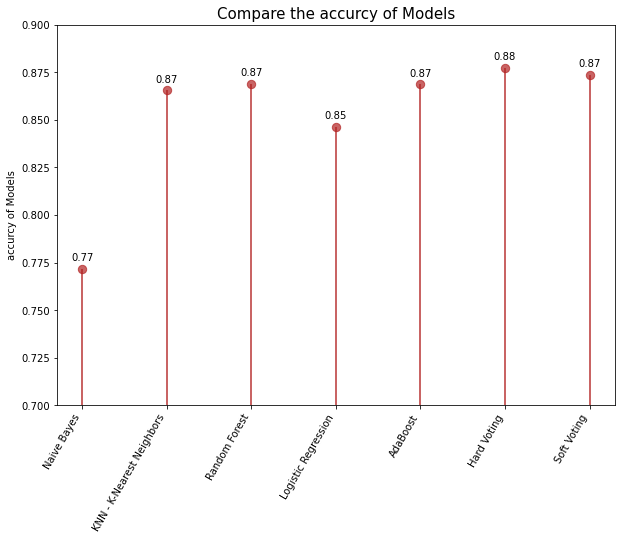

In [398]:
# Draw plot of Compare the accurcy of Models
fig, ax = plt.subplots(figsize=(10,7))
ax.vlines(x=performance_data.index, ymin=0, ymax=performance_data.accuracy, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=performance_data.index, y=performance_data.accuracy, s=70, color='firebrick', alpha=0.7)
ax.set_title('Compare the accurcy of Models', fontdict={'size':15})
ax.set_ylabel('accurcy of Models')
ax.set_xticks(performance_data.index)
ax.set_xticklabels(performance_data.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':10})
ax.set_ylim(0.7,0.9)
for row in performance_data.itertuples():
    ax.text(row.Index, row.accuracy+.003, s=round(row.accuracy, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)


## Part 5 : Dimensionality Reduction 

### PCA - Principal Component Analysis
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.<br>
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.


In [360]:
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

#### Explained Variance Ratio



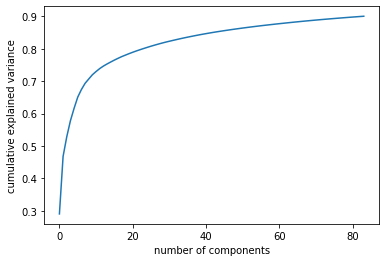

In [361]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [362]:
print(f"We decided to choose {pca.n_components_} number of components That explain 90% of the variance")

We decided to choose 84 number of components That explain 90% of the variance


In [363]:
print(f"We can pay attention that the shape of the training significantly decreased from {X_train.shape} to {X_train_reduced.shape} ")

We can pay attention that the shape of the training significantly decreased from (48000, 784) to (48000, 84) 


## Part 6 : Training and Testing Models 


We will re-training and re-testing the models we performed in the previous part of the notebook<br>
but now we will do so after using dimension reduction in order to get a comparison and decided on what to use

### Model #0 : Naive Bayes

In [553]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_reduced, Y_train)
y_predict_naive_bayes = naive_bayes.fit(X_train_reduced, Y_train).predict(X_test_reduced)
naive_bayes2_accuracy = accuracy_score(Y_test,y_predict_naive_bayes)
print("The accuracy of the zero model of Naive Bayes is {:0.4f}%".format(naive_bayes2_accuracy*100))

The accuracy of the zero model of Naive Bayes is 77.1833%


In [554]:
# Classification report
naive_bayes2_prec = precision_score(y_predict_naive_bayes,Y_test, average='macro')
print('precision:',naive_bayes2_prec)
naive_bayes2_recall = recall_score(y_predict_naive_bayes,Y_test, average='macro')
print('recall:',naive_bayes2_recall)
naive_bayes2_f1 = f1_score(y_predict_naive_bayes,Y_test, average='macro')
print('f1:',naive_bayes2_f1)
naive_bayes2_f2 = metrics.fbeta_score(y_predict_naive_bayes, Y_test, beta=3,average='macro')
print("f2:",naive_bayes2_f2)

precision: 0.7703600462268844
recall: 0.7755968417459205
f1: 0.7708499976595697
f2: 0.7743170578081574


### Model #1 : KNN - K-Nearest Neighbors

In [405]:
# Using Knn model 
knn = KNeighborsClassifier()
knn.fit(X_train_reduced, Y_train)
y_predict_knn = knn.predict(X_test_reduced)
knn_accuracy2 = accuracy_score(Y_test,y_predict_knn)

In [406]:
print("The accuracy of KNN - K-Nearest Neighbors model is {:0.4f}%".format(knn_accuracy2*100))

The accuracy of KNN - K-Nearest Neighbors model is 86.3167%


In [407]:
# Classification report
knn2_prec = precision_score(y_predict_knn,Y_test, average='macro')
print('precision:',knn2_prec)
knn2_recall = recall_score(y_predict_knn,Y_test, average='macro')
print('recall:',knn2_recall)
knn2_f1 = f1_score(y_predict_knn,Y_test, average='macro')
print('f1:',knn2_f1)
knn2_f2 = metrics.fbeta_score(y_predict_knn, Y_test, beta=3,average='macro')
print("f2:",knn2_f2)

precision: 0.8616101792504927
recall: 0.862034017947283
f1: 0.8610417431940702
f2: 0.8617049113109218


### Model #2 : RandomForest

In [408]:
# Using Random Forest model 
random_forest = RandomForestClassifier()
random_forest.fit(X_train_reduced, Y_train)
y_predict_random_forest = random_forest.predict(X_test_reduced)
random_forest_accuracy2 = accuracy_score(Y_test,y_predict_random_forest)

In [409]:
print("The accuracy of the RandomForest model is {:0.4f}%".format(random_forest_accuracy2*100))

The accuracy of the RandomForest model is 86.5917%


In [410]:
# Classification report
random_forest2_prec = precision_score(y_predict_random_forest,Y_test, average='macro')
print('precision:',random_forest2_prec)
random_forest2_recall = recall_score(y_predict_random_forest,Y_test, average='macro')
print('recall:',random_forest2_recall)
random_forest2_f1 = f1_score(y_predict_random_forest,Y_test, average='macro')
print('f1:',random_forest2_f1)
random_forest2_f2 = metrics.fbeta_score(y_predict_random_forest, Y_test, beta=3,average='macro')
print("f2:",random_forest2_f2)

precision: 0.8642804067340485
recall: 0.8630034123500199
f1: 0.8627671781426096
f2: 0.862800627459524


### Model #3 : Logistic Regression

In [411]:
# Using Logistic Regression model 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_reduced, Y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test_reduced)
logistic_regression_accuracy2 = accuracy_score(Y_test,y_predict_logistic_regression)

In [412]:
print("The accuracy of the Logistic Regression model is {:0.4f}%".format(logistic_regression_accuracy2*100))

The accuracy of the Logistic Regression model is 84.6500%


In [413]:
# Classification report
logistic_regression2_prec = precision_score(y_predict_logistic_regression,Y_test, average='macro')
print('precision:',logistic_regression2_prec)
logistic_regression2_recall = recall_score(y_predict_logistic_regression,Y_test, average='macro')
print('recall:',logistic_regression2_recall)
logistic_regression2_f1 = f1_score(y_predict_logistic_regression,Y_test, average='macro')
print('f1:',logistic_regression2_f1)
logistic_regression2_f2 = metrics.fbeta_score(y_predict_logistic_regression, Y_test, beta=3,average='macro')
print("f2:",logistic_regression2_f2)

precision: 0.8446637133817212
recall: 0.8434755625787396
f1: 0.8437640746247401
f2: 0.8434836333204349


### Model #4 : AdaBoost

In [414]:
ada_boost = AdaBoostClassifier(base_estimator=random_forest)
ada_boost.fit(X_train_reduced, Y_train)
y_predict_ada_boost = ada_boost.predict(X_test_reduced)
ada_accuracy2 = accuracy_score(Y_test,y_predict_ada_boost)

In [415]:
print("The accuracy of the AdaBoost model is {:0.4f}%".format(ada_accuracy2*100))

The accuracy of the AdaBoost model is 86.7917%


In [416]:
# Classification report
ada_boost2_prec = precision_score(y_predict_ada_boost,Y_test, average='macro')
print('precision:',ada_boost2_prec)
ada_boost2_recall = recall_score(y_predict_ada_boost,Y_test, average='macro')
print('recall:',ada_boost2_recall)
ada_boost2_f1 = f1_score(y_predict_ada_boost,Y_test, average='macro')
print('f1:',ada_boost2_f1)
ada_boost2_f2 = metrics.fbeta_score(y_predict_ada_boost, Y_test, beta=3,average='macro')
print("f2:",ada_boost2_f2)

precision: 0.8662783557007504
recall: 0.865488868962618
f1: 0.8648829721394533
f2: 0.865186582329496


### Model #5 : Hard and Soft Voting

In [417]:
# Using Hard and Soft Voting model
model_1 = knn
model_2 = random_forest
model_3 = logistic_regression
model_4 = ada_boost

In [756]:
hard_voting = VotingClassifier(estimators=[('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)], voting='hard')
hard_voting.fit(X_train_reduced, Y_train)
y_predict_hard_voting = hard_voting.predict(X_test_reduced)
hard_voting_accuracy2 = accuracy_score(Y_test,y_predict_hard_voting)

In [757]:
print("The accuracy of the hard voting model is {:0.4f}%".format(hard_voting_accuracy2 *100))

The accuracy of the hard voting model is 87.5000%


In [420]:
# Classification report
hard_voting2_prec = precision_score(y_predict_hard_voting,Y_test, average='macro')
print('precision:',hard_voting2_prec)
hard_voting2_recall = recall_score(y_predict_hard_voting,Y_test, average='macro')
print('recall:',hard_voting2_recall)
hard_voting2_f1 = f1_score(y_predict_hard_voting,Y_test, average='macro')
print('f1:',hard_voting2_f1)
hard_voting2_f2 = metrics.fbeta_score(y_predict_hard_voting, Y_test, beta=3,average='macro')
print("f2:",hard_voting2_f2)

precision: 0.8726972885749792
recall: 0.8723696808262579
f1: 0.8708358860687706
f2: 0.8717358219814779


In [763]:
soft_voting = VotingClassifier(estimators=[('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)],
                               voting='soft' , weights=[1,3,1,5])
soft_voting.fit(X_train_reduced, Y_train)
y_predict_soft_voting = soft_voting.predict(X_test_reduced)
soft_voting_accuracy2 = accuracy_score(Y_test,y_predict_soft_voting)

In [764]:
print("The accuracy of the soft voting model is {:0.4f}%".format(soft_voting_accuracy2 *100))

The accuracy of the soft voting model is 87.7750%


In [423]:
# Classification report
soft_voting2_prec = precision_score(y_predict_soft_voting,Y_test, average='macro')
print('precision:',soft_voting2_prec)
soft_voting2_recall = recall_score(y_predict_soft_voting,Y_test, average='macro')
print('recall:',soft_voting2_recall)
soft_voting2_f1 = f1_score(y_predict_soft_voting,Y_test, average='macro')
print('f1:',soft_voting2_f1)
soft_voting2_f2 = metrics.fbeta_score(y_predict_soft_voting, Y_test, beta=3,average='macro')
print("f2:",soft_voting2_f2)

precision: 0.8761253165652043
recall: 0.8751516313968123
f1: 0.8751316397954947
f2: 0.8750617052247203


### Sum up the results

In [765]:
# Creating DataFrame of the different model performance
model2 = ['Naive Bayes','KNN - K-Nearest Neighbors' , 'Random Forest' , 'Logistic Regression' , 'AdaBoost' , 'Hard Voting' , 'Soft Voting']
precision2 = [naive_bayes2_prec,knn2_prec , random_forest2_prec , logistic_regression2_prec,ada_boost2_prec,soft_voting2_prec,hard_voting2_prec]
recall2 = [naive_bayes2_recall,knn2_recall , random_forest2_recall , logistic_regression2_recall,ada_boost2_recall,soft_voting2_recall,hard_voting2_recall]
f1_2 = [naive_bayes2_f1,knn2_f1 , random_forest2_f1 , logistic_regression2_f1,ada_boost2_f1,soft_voting2_f1 , hard_voting2_f1]
f2_2 = [naive_bayes2_f2,knn2_f2 , random_forest2_f2 , logistic_regression2_f2,ada_boost2_f2,soft_voting2_f2,hard_voting2_f2]
accuracy2 = [naive_bayes2_accuracy,knn_accuracy2 , random_forest_accuracy2 , logistic_regression_accuracy2,ada_accuracy2,soft_voting_accuracy2 , hard_voting_accuracy2]

performance2 ={ 
                   'precision_': precision2 ,
                   'recall_' : recall2 , 
                   'f1_' : f1_2 ,
                   'f2_' : f2_2 ,
                   'accuracy_' : accuracy2}

performance_data2 = pd.DataFrame(data = performance2 ,index=model)


In [766]:
# Merage the 2 DataFrame
concatenated = pd.concat([performance_data, performance_data2],axis="columns")

In [767]:
# Create multindex for columns
cols = pd.MultiIndex.from_tuples([('Using without PCA 784 features', 'precision'), ('Using without PCA 784 features', 'recall'), ('Using without PCA 784 features', 'f1'), ('Using without PCA 784 features', 'f2'),('Using without PCA 784 features', 'accuracy')
                                 ,('Using with PCA 84 features', 'precision_'), ('Using with PCA 84 features', 'recall_'), ('Using with PCA 84 features', 'f1_'), ('Using with PCA 84 features', 'f2_'),('Using with PCA 84 features', 'accuracy_')])
cols.set_index = (['precision', 'recall','f1','f2','accuracy'])
df = pd.DataFrame(data=concatenated, columns = cols ,index=model)

In [768]:
df[('Using without PCA 784 features',  'precision')]= concatenated['precision']
df[('Using without PCA 784 features',  'recall')]   = concatenated['recall']
df[('Using without PCA 784 features',  'f1')]       = concatenated['f1']
df[('Using without PCA 784 features',  'f2')]       = concatenated['f2']
df[('Using without PCA 784 features',  'accuracy')] = concatenated['accuracy']
df[('Using with PCA 84 features',  'precision_')]= concatenated['precision_']
df[('Using with PCA 84 features',  'recall_')]   = concatenated['recall_']
df[('Using with PCA 84 features',  'f1_')]       = concatenated['f1_']
df[('Using with PCA 84 features',  'f2_')]       = concatenated['f2_']
df[('Using with PCA 84 features',  'accuracy_')] = concatenated['accuracy_']

In [769]:
df

Using without PCA 784 features                      \
                                               precision    recall        f1   
Naive Bayes                                     0.587708  0.634673  0.558967   
KNN - K-Nearest Neighbors                       0.864090  0.865266  0.863827   
Random Forest                                   0.882935  0.882063  0.881839   
Logistic Regression                             0.852556  0.851718  0.851972   
AdaBoost                                        0.883445  0.882806  0.882320   
Hard Voting                                     0.887336  0.886565  0.886173   
Soft Voting                                     0.885099  0.885039  0.883374   

                                              Using with PCA 84 features  \
                                 f2  accuracy                 precision_   
Naive Bayes                0.601906  0.591000                   0.770360   
KNN - K-Nearest Neighbors  0.864838  0.865667                   0.861610   
Random Forest              0.881905  0.869083                   0.864280   
Logistic Regression        0.851742  0.846500                   0.844664   
AdaBoost                   0.882567  0.868833                   0.866278   
Hard Voting                0.886349  0.877417                   0.876125   
Soft Voting                0.884377  0.873833                   0.872697   

                                                                   
                            recall_       f1_       f2_ accuracy_  
Naive Bayes                0.775597  0.770850  0.774317  0.771833  
KNN - K-Nearest Neighbors  0.862034  0.861042  0.861705  0.863167  
Random Forest              0.863003  0.862767  0.862801  0.865917  
Logistic Regression        0.843476  0.843764  0.843484  0.846500  
AdaBoost                   0.865489  0.864883  0.865187  0.867917  
Hard Voting                0.875152  0.875132  0.875062  0.877750  
Soft Voting                0.872370  0.870836  0.871736  0.875000

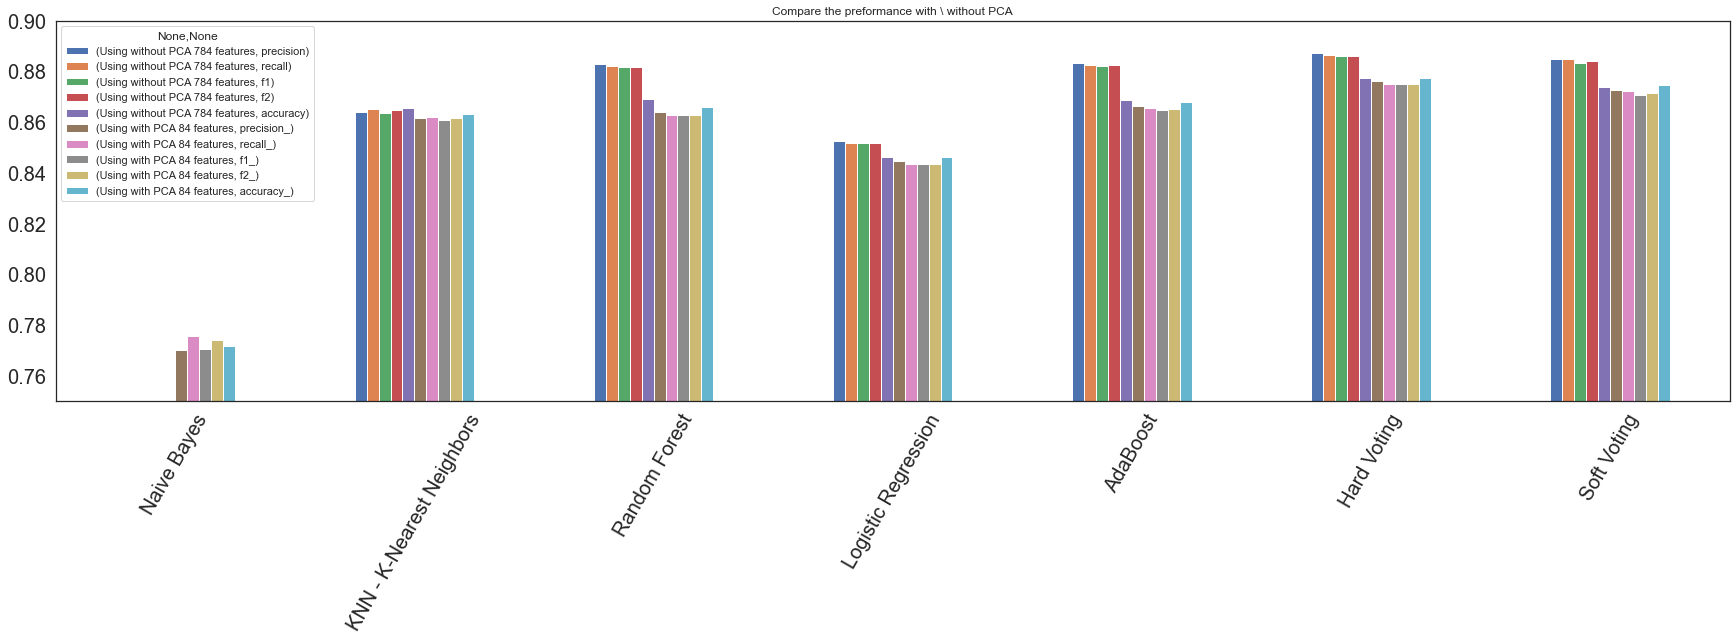

In [721]:
df.plot(figsize=(30,7),use_index=True , rot=60  , fontsize=20 ,kind = 'bar' ,ylim=(0.75,0.9),
        title = "Compare the preformance with \ without PCA");


we can see that there are not such a diffrence between the preformance without PCA <br> 
and the preformance of the models Using PCA.<br>
So its better to use the PCA with only 84 eatures.

In [770]:
df.loc[(df.index), ('Using with PCA 84 features',  'accuracy_')]

Naive Bayes                  0.771833
KNN - K-Nearest Neighbors    0.863167
Random Forest                0.865917
Logistic Regression          0.846500
AdaBoost                     0.867917
Hard Voting                  0.877750
Soft Voting                  0.875000
Name: (Using with PCA 84 features, accuracy_), dtype: float64

**Finally** , we can pick the best model by accuracy so we can test him on the real test of the dataset <br>
Also , we will tuning hyperparameter and try to push the model better.

## Part 7 : Tuning The Best Model  HyperParameters
